In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
sns.set(style='white', context='notebook', palette='deep')

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

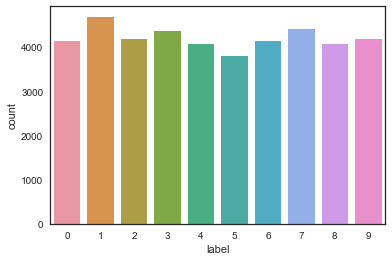

In [5]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [6]:
random_seed = 2

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=random_seed)

In [8]:
X_train.to_csv('X_trainn.csv')

In [9]:
Y_train.to_csv('Y_trainn.csv')

In [10]:
X_val.to_csv('X_vall.csv')

In [11]:
Y_val.to_csv('Y_vall.csv')

In [12]:
X_train = X_train / 255.0
X_val = X_val / 255.0
test = test / 255.0

In [13]:
X_train.shape

(29400, 784)

In [14]:
X_train = X_train.values.reshape(-1,28,28,1)

In [15]:
X_val = X_val.values.reshape(-1,28,28,1)

In [16]:
test = test.values.reshape(-1,28,28,1)

In [17]:
Y_train = to_categorical(Y_train, num_classes = 10)
Y_val = to_categorical(Y_val, num_classes = 10)

In [ ]:
#compare activations function

In [ ]:
#model1 use relu

In [21]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [22]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [23]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [28]:
epochs = 20
batch_size = 86

In [29]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [30]:
import time 
t1=time.time()
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 

Epoch 1/20
 - 212s - loss: 0.1097 - acc: 0.9675 - val_loss: 0.0512 - val_acc: 0.9857
Epoch 2/20
 - 224s - loss: 0.0907 - acc: 0.9736 - val_loss: 0.0349 - val_acc: 0.9892
Epoch 3/20
 - 215s - loss: 0.0811 - acc: 0.9758 - val_loss: 0.0434 - val_acc: 0.9879
Epoch 4/20
 - 216s - loss: 0.0744 - acc: 0.9782 - val_loss: 0.0347 - val_acc: 0.9900
Epoch 5/20
 - 214s - loss: 0.0677 - acc: 0.9805 - val_loss: 0.0295 - val_acc: 0.9917
Epoch 6/20
 - 220s - loss: 0.0655 - acc: 0.9814 - val_loss: 0.0297 - val_acc: 0.9920
Epoch 7/20
 - 232s - loss: 0.0655 - acc: 0.9818 - val_loss: 0.0285 - val_acc: 0.9912
Epoch 8/20
 - 233s - loss: 0.0600 - acc: 0.9825 - val_loss: 0.0267 - val_acc: 0.9922
Epoch 9/20
 - 234s - loss: 0.0617 - acc: 0.9823 - val_loss: 0.0256 - val_acc: 0.9925
Epoch 10/20
 - 235s - loss: 0.0613 - acc: 0.9831 - val_loss: 0.0340 - val_acc: 0.9912
Epoch 11/20
 - 231s - loss: 0.0592 - acc: 0.9839 - val_loss: 0.0396 - val_acc: 0.9901
Epoch 12/20
 - 222s - loss: 0.0606 - acc: 0.9829 - val_loss: 0.

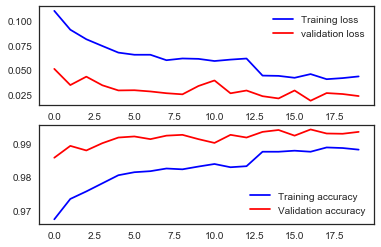

In [31]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [32]:
score = model.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

validation loss: 0.0238357168668
validation accuracy: 0.993333333333


In [ ]:
#model2 use tanh

In [33]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='tanh', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='tanh'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='tanh'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='tanh'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "tanh"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [34]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [35]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [36]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [37]:
epochs = 20
batch_size = 86

In [38]:
import time 
t1=time.time()
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 

Epoch 1/20
 - 202s - loss: 0.5826 - acc: 0.8187 - val_loss: 0.1207 - val_acc: 0.9603
Epoch 2/20
 - 202s - loss: 0.2097 - acc: 0.9344 - val_loss: 0.0595 - val_acc: 0.9821
Epoch 3/20
 - 205s - loss: 0.1646 - acc: 0.9492 - val_loss: 0.0507 - val_acc: 0.9833
Epoch 4/20
 - 225s - loss: 0.1423 - acc: 0.9550 - val_loss: 0.0514 - val_acc: 0.9838
Epoch 5/20
 - 234s - loss: 0.1327 - acc: 0.9602 - val_loss: 0.0507 - val_acc: 0.9838
Epoch 6/20
 - 228s - loss: 0.1198 - acc: 0.9638 - val_loss: 0.0491 - val_acc: 0.9844
Epoch 7/20
 - 238s - loss: 0.1126 - acc: 0.9664 - val_loss: 0.0583 - val_acc: 0.9821
Epoch 8/20
 - 241s - loss: 0.1059 - acc: 0.9674 - val_loss: 0.0430 - val_acc: 0.9871
Epoch 9/20
 - 230s - loss: 0.1024 - acc: 0.9703 - val_loss: 0.0375 - val_acc: 0.9885
Epoch 10/20
 - 221s - loss: 0.0983 - acc: 0.9701 - val_loss: 0.0429 - val_acc: 0.9867
Epoch 11/20
 - 217s - loss: 0.0936 - acc: 0.9703 - val_loss: 0.0392 - val_acc: 0.9879
Epoch 12/20
 - 214s - loss: 0.0926 - acc: 0.9716 - val_loss: 0.

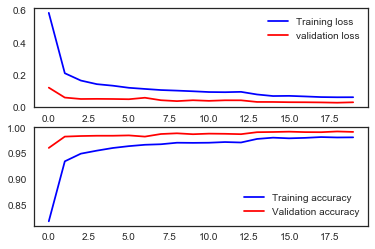

In [39]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [40]:
score = model.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

validation loss: 0.0302546483459
validation accuracy: 0.991190476153


In [ ]:
#model3 sigmoid

In [41]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='sigmoid', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='sigmoid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='sigmoid'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='sigmoid'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [42]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [43]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [44]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [45]:
epochs = 20
batch_size = 86

In [46]:
import time 
t1=time.time()
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 

Epoch 1/20
 - 221s - loss: 2.3299 - acc: 0.1063 - val_loss: 2.3012 - val_acc: 0.1147
Epoch 2/20
 - 220s - loss: 2.0684 - acc: 0.2251 - val_loss: 1.0483 - val_acc: 0.6919
Epoch 3/20
 - 210s - loss: 0.9947 - acc: 0.6685 - val_loss: 0.2748 - val_acc: 0.9279
Epoch 4/20
 - 200s - loss: 0.4011 - acc: 0.8753 - val_loss: 0.1363 - val_acc: 0.9622
Epoch 5/20
 - 200s - loss: 0.2463 - acc: 0.9244 - val_loss: 0.1057 - val_acc: 0.9653
Epoch 6/20
 - 200s - loss: 0.1926 - acc: 0.9419 - val_loss: 0.0755 - val_acc: 0.9771
Epoch 7/20
 - 200s - loss: 0.1686 - acc: 0.9477 - val_loss: 0.0688 - val_acc: 0.9787
Epoch 8/20
 - 200s - loss: 0.1431 - acc: 0.9577 - val_loss: 0.0655 - val_acc: 0.9790
Epoch 9/20
 - 200s - loss: 0.1331 - acc: 0.9588 - val_loss: 0.0543 - val_acc: 0.9832
Epoch 10/20
 - 200s - loss: 0.1243 - acc: 0.9632 - val_loss: 0.0509 - val_acc: 0.9838
Epoch 11/20
 - 200s - loss: 0.1137 - acc: 0.9667 - val_loss: 0.0451 - val_acc: 0.9860
Epoch 12/20
 - 200s - loss: 0.1125 - acc: 0.9663 - val_loss: 0.

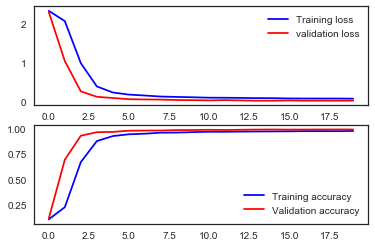

In [47]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [48]:
score = model.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

validation loss: 0.0376014414713
validation accuracy: 0.989047619048


In [ ]:
#model4 elu

Epoch 1/20
 - 213s - loss: 0.4906 - acc: 0.8452 - val_loss: 0.0884 - val_acc: 0.9715
Epoch 2/20
 - 223s - loss: 0.2313 - acc: 0.9302 - val_loss: 0.0716 - val_acc: 0.9788
Epoch 3/20
 - 223s - loss: 0.1882 - acc: 0.9465 - val_loss: 0.0485 - val_acc: 0.9853
Epoch 4/20
 - 225s - loss: 0.1569 - acc: 0.9558 - val_loss: 0.0504 - val_acc: 0.9863
Epoch 5/20
 - 228s - loss: 0.1447 - acc: 0.9596 - val_loss: 0.0519 - val_acc: 0.9840
Epoch 6/20
 - 273s - loss: 0.1332 - acc: 0.9635 - val_loss: 0.0494 - val_acc: 0.9858
Epoch 7/20
 - 258s - loss: 0.1328 - acc: 0.9633 - val_loss: 0.0420 - val_acc: 0.9877
Epoch 8/20
 - 235s - loss: 0.1258 - acc: 0.9664 - val_loss: 0.0399 - val_acc: 0.9887
Epoch 9/20
 - 208s - loss: 0.1246 - acc: 0.9665 - val_loss: 0.0452 - val_acc: 0.9871
Epoch 10/20
 - 204s - loss: 0.1162 - acc: 0.9694 - val_loss: 0.0405 - val_acc: 0.9897
Epoch 11/20
 - 204s - loss: 0.1105 - acc: 0.9704 - val_loss: 0.0395 - val_acc: 0.9900
Epoch 12/20
 - 203s - loss: 0.1098 - acc: 0.9719 - val_loss: 0.

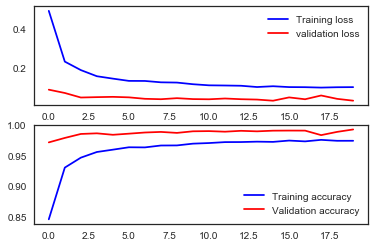

In [49]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='elu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='elu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='elu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='elu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "elu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#model5 selu

Epoch 1/20
 - 237s - loss: 0.7478 - acc: 0.7820 - val_loss: 0.1186 - val_acc: 0.9641
Epoch 2/20
 - 278s - loss: 0.3456 - acc: 0.8988 - val_loss: 0.0974 - val_acc: 0.9721
Epoch 3/20
 - 287s - loss: 0.2704 - acc: 0.9237 - val_loss: 0.1081 - val_acc: 0.9677
Epoch 4/20
 - 271s - loss: 0.2311 - acc: 0.9364 - val_loss: 0.0861 - val_acc: 0.9747
Epoch 5/20
 - 247s - loss: 0.1936 - acc: 0.9463 - val_loss: 0.0489 - val_acc: 0.9840
Epoch 6/20
 - 258s - loss: 0.1781 - acc: 0.9496 - val_loss: 0.0754 - val_acc: 0.9786
Epoch 7/20
 - 239s - loss: 0.1704 - acc: 0.9519 - val_loss: 0.0834 - val_acc: 0.9737
Epoch 8/20
 - 232s - loss: 0.1584 - acc: 0.9557 - val_loss: 0.0425 - val_acc: 0.9878
Epoch 9/20
 - 230s - loss: 0.1531 - acc: 0.9582 - val_loss: 0.0683 - val_acc: 0.9825
Epoch 10/20
 - 231s - loss: 0.1392 - acc: 0.9618 - val_loss: 0.0505 - val_acc: 0.9858
Epoch 11/20
 - 230s - loss: 0.1474 - acc: 0.9586 - val_loss: 0.0567 - val_acc: 0.9863
Epoch 12/20
 - 230s - loss: 0.1371 - acc: 0.9626 - val_loss: 0.

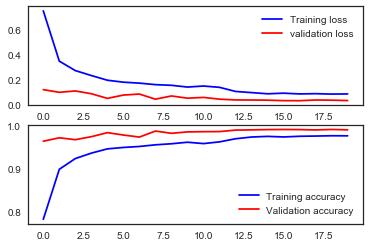

In [50]:
model5 = Sequential()

model5.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='selu', input_shape = (28,28,1)))
model5.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='selu'))
model5.add(MaxPool2D(pool_size=(2,2)))
model5.add(Dropout(0.25))


model5.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='selu'))
model5.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='selu'))
model5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model5.add(Dropout(0.25))


model5.add(Flatten())
model5.add(Dense(256, activation = "selu"))
model5.add(Dropout(0.5))
model5.add(Dense(10, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


model5.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model5.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model5.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#model6 softplus

Epoch 1/20
 - 226s - loss: 1.7483 - acc: 0.3929 - val_loss: 0.2350 - val_acc: 0.9275
Epoch 2/20
 - 225s - loss: 0.4169 - acc: 0.8735 - val_loss: 0.1103 - val_acc: 0.9659
Epoch 3/20
 - 228s - loss: 0.2635 - acc: 0.9228 - val_loss: 0.0802 - val_acc: 0.9749
Epoch 4/20
 - 226s - loss: 0.2064 - acc: 0.9390 - val_loss: 0.0814 - val_acc: 0.9753
Epoch 5/20
 - 226s - loss: 0.1801 - acc: 0.9477 - val_loss: 0.0749 - val_acc: 0.9794
Epoch 6/20
 - 226s - loss: 0.1654 - acc: 0.9536 - val_loss: 0.0661 - val_acc: 0.9807
Epoch 7/20
 - 233s - loss: 0.1542 - acc: 0.9571 - val_loss: 0.0650 - val_acc: 0.9834
Epoch 8/20
 - 228s - loss: 0.1511 - acc: 0.9580 - val_loss: 0.0667 - val_acc: 0.9811
Epoch 9/20
 - 227s - loss: 0.1461 - acc: 0.9598 - val_loss: 0.0584 - val_acc: 0.9840
Epoch 10/20
 - 227s - loss: 0.1471 - acc: 0.9607 - val_loss: 0.0553 - val_acc: 0.9849
Epoch 11/20
 - 227s - loss: 0.1479 - acc: 0.9598 - val_loss: 0.0441 - val_acc: 0.9872
Epoch 12/20
 - 226s - loss: 0.1466 - acc: 0.9622 - val_loss: 0.

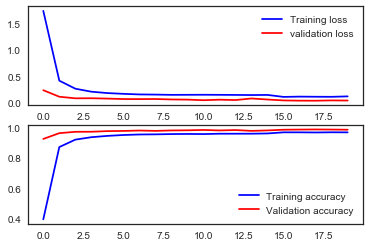

In [51]:
model6 = Sequential()

model6.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='softplus', input_shape = (28,28,1)))
model6.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='softplus'))
model6.add(MaxPool2D(pool_size=(2,2)))
model6.add(Dropout(0.25))


model6.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='softplus'))
model6.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='softplus'))
model6.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model6.add(Dropout(0.25))


model6.add(Flatten())
model6.add(Dense(256, activation = "softplus"))
model6.add(Dropout(0.5))
model6.add(Dense(10, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


model6.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model6.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model6.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#model7 softsign

Epoch 1/20
 - 210s - loss: 0.4307 - acc: 0.8610 - val_loss: 0.0983 - val_acc: 0.9697
Epoch 2/20
 - 210s - loss: 0.1934 - acc: 0.9409 - val_loss: 0.0747 - val_acc: 0.9782
Epoch 3/20
 - 210s - loss: 0.1532 - acc: 0.9547 - val_loss: 0.0561 - val_acc: 0.9825
Epoch 4/20
 - 210s - loss: 0.1356 - acc: 0.9588 - val_loss: 0.0545 - val_acc: 0.9846
Epoch 5/20
 - 210s - loss: 0.1217 - acc: 0.9627 - val_loss: 0.0487 - val_acc: 0.9844
Epoch 6/20
 - 210s - loss: 0.1113 - acc: 0.9659 - val_loss: 0.0549 - val_acc: 0.9831
Epoch 7/20
 - 210s - loss: 0.1029 - acc: 0.9681 - val_loss: 0.0403 - val_acc: 0.9879
Epoch 8/20
 - 210s - loss: 0.1015 - acc: 0.9696 - val_loss: 0.0455 - val_acc: 0.9863
Epoch 9/20
 - 210s - loss: 0.0965 - acc: 0.9706 - val_loss: 0.0414 - val_acc: 0.9873
Epoch 10/20
 - 209s - loss: 0.0928 - acc: 0.9729 - val_loss: 0.0406 - val_acc: 0.9867
Epoch 11/20
 - 210s - loss: 0.0870 - acc: 0.9735 - val_loss: 0.0358 - val_acc: 0.9891
Epoch 12/20
 - 210s - loss: 0.0779 - acc: 0.9752 - val_loss: 0.

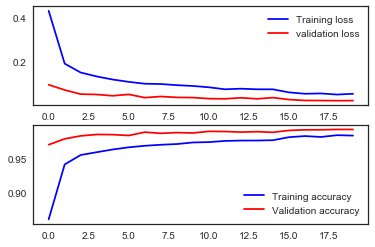

In [52]:
model7 = Sequential()

model7.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='softsign', input_shape = (28,28,1)))
model7.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='softsign'))
model7.add(MaxPool2D(pool_size=(2,2)))
model7.add(Dropout(0.25))


model7.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='softsign'))
model7.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='softsign'))
model7.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model7.add(Dropout(0.25))


model7.add(Flatten())
model7.add(Dense(256, activation = "softsign"))
model7.add(Dropout(0.5))
model7.add(Dense(10, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


model7.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model7.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model7.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#model8 hard_sigmoid

Epoch 1/20
 - 261s - loss: 2.3679 - acc: 0.1010 - val_loss: 2.3059 - val_acc: 0.0943
Epoch 2/20
 - 250s - loss: 2.3067 - acc: 0.1036 - val_loss: 2.3011 - val_acc: 0.1147
Epoch 3/20
 - 260s - loss: 2.3040 - acc: 0.1058 - val_loss: 2.3020 - val_acc: 0.1039
Epoch 4/20
 - 266s - loss: 2.3026 - acc: 0.1056 - val_loss: 2.3016 - val_acc: 0.1147
Epoch 5/20
 - 259s - loss: 2.3026 - acc: 0.1062 - val_loss: 2.3016 - val_acc: 0.1147
Epoch 6/20
 - 221s - loss: 2.3030 - acc: 0.1074 - val_loss: 2.3012 - val_acc: 0.1147

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/20
 - 220s - loss: 2.3023 - acc: 0.1059 - val_loss: 2.3012 - val_acc: 0.1147
Epoch 8/20
 - 219s - loss: 2.3021 - acc: 0.1086 - val_loss: 2.3011 - val_acc: 0.1147
Epoch 9/20
 - 219s - loss: 2.3021 - acc: 0.1066 - val_loss: 2.3009 - val_acc: 0.1147

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 10/20
 - 221s - loss: 2.3021 - acc: 0.1105 - val_loss: 2.3010 - val

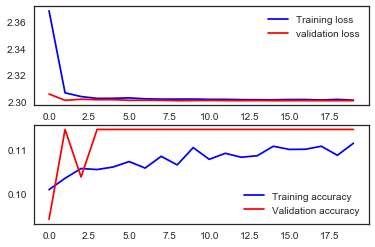

In [53]:
model8 = Sequential()

model8.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='hard_sigmoid', input_shape = (28,28,1)))
model8.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='hard_sigmoid'))
model8.add(MaxPool2D(pool_size=(2,2)))
model8.add(Dropout(0.25))


model8.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='hard_sigmoid'))
model8.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='hard_sigmoid'))
model8.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model8.add(Dropout(0.25))


model8.add(Flatten())
model8.add(Dense(256, activation = "hard_sigmoid"))
model8.add(Dropout(0.5))
model8.add(Dense(10, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


model8.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model8.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model8.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#model9 linear

Epoch 1/20
 - 212s - loss: 0.5934 - acc: 0.8081 - val_loss: 0.1364 - val_acc: 0.9598
Epoch 2/20
 - 213s - loss: 0.2946 - acc: 0.9108 - val_loss: 0.1286 - val_acc: 0.9625
Epoch 3/20
 - 215s - loss: 0.2549 - acc: 0.9221 - val_loss: 0.0972 - val_acc: 0.9728
Epoch 4/20
 - 226s - loss: 0.2356 - acc: 0.9273 - val_loss: 0.0758 - val_acc: 0.9771
Epoch 5/20
 - 216s - loss: 0.2195 - acc: 0.9329 - val_loss: 0.0763 - val_acc: 0.9783
Epoch 6/20
 - 217s - loss: 0.2093 - acc: 0.9354 - val_loss: 0.0679 - val_acc: 0.9790
Epoch 7/20
 - 220s - loss: 0.2072 - acc: 0.9364 - val_loss: 0.0818 - val_acc: 0.9763
Epoch 8/20
 - 218s - loss: 0.1945 - acc: 0.9418 - val_loss: 0.0620 - val_acc: 0.9794
Epoch 9/20
 - 219s - loss: 0.1912 - acc: 0.9430 - val_loss: 0.0615 - val_acc: 0.9805
Epoch 10/20
 - 218s - loss: 0.1900 - acc: 0.9428 - val_loss: 0.0730 - val_acc: 0.9763
Epoch 11/20
 - 219s - loss: 0.1849 - acc: 0.9438 - val_loss: 0.1009 - val_acc: 0.9710
Epoch 12/20
 - 218s - loss: 0.1796 - acc: 0.9462 - val_loss: 0.

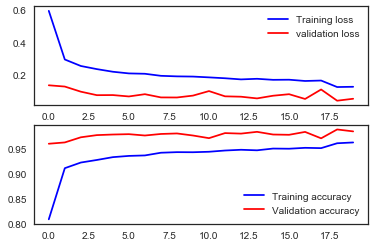

In [54]:
model9 = Sequential()

model9.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='linear', input_shape = (28,28,1)))
model9.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='linear'))
model9.add(MaxPool2D(pool_size=(2,2)))
model9.add(Dropout(0.25))


model9.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='linear'))
model9.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='linear'))
model9.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model9.add(Dropout(0.25))


model9.add(Flatten())
model9.add(Dense(256, activation = "linear"))
model9.add(Dropout(0.5))
model9.add(Dense(10, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


model9.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model9.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model9.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#accuracy of model1 is best, activation function choose relu

In [ ]:
#cost function: use mean_squared_error

Epoch 1/20
 - 248s - loss: 0.0241 - acc: 0.8229 - val_loss: 0.0054 - val_acc: 0.9639
Epoch 2/20
 - 257s - loss: 0.0080 - acc: 0.9478 - val_loss: 0.0035 - val_acc: 0.9778
Epoch 3/20
 - 254s - loss: 0.0060 - acc: 0.9614 - val_loss: 0.0027 - val_acc: 0.9827
Epoch 4/20
 - 257s - loss: 0.0049 - acc: 0.9679 - val_loss: 0.0018 - val_acc: 0.9888
Epoch 5/20
 - 253s - loss: 0.0044 - acc: 0.9722 - val_loss: 0.0017 - val_acc: 0.9892
Epoch 6/20
 - 228s - loss: 0.0040 - acc: 0.9742 - val_loss: 0.0017 - val_acc: 0.9895
Epoch 7/20
 - 214s - loss: 0.0038 - acc: 0.9764 - val_loss: 0.0021 - val_acc: 0.9878
Epoch 8/20
 - 213s - loss: 0.0037 - acc: 0.9765 - val_loss: 0.0014 - val_acc: 0.9916
Epoch 9/20
 - 213s - loss: 0.0034 - acc: 0.9785 - val_loss: 0.0017 - val_acc: 0.9895
Epoch 10/20
 - 213s - loss: 0.0032 - acc: 0.9798 - val_loss: 0.0014 - val_acc: 0.9915
Epoch 11/20
 - 212s - loss: 0.0031 - acc: 0.9813 - val_loss: 0.0014 - val_acc: 0.9911
Epoch 12/20
 - 212s - loss: 0.0031 - acc: 0.9810 - val_loss: 0.

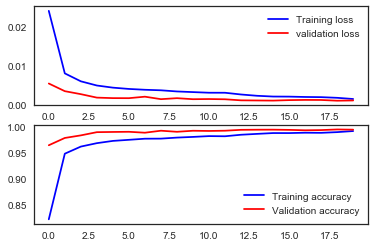

In [55]:
model10 = Sequential()

model10.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model10.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model10.add(MaxPool2D(pool_size=(2,2)))
model10.add(Dropout(0.25))


model10.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model10.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model10.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model10.add(Dropout(0.25))


model10.add(Flatten())
model10.add(Dense(256, activation = "relu"))
model10.add(Dropout(0.5))
model10.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model10.compile(optimizer = optimizer , loss = "mean_squared_error", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model10.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model10.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#use mean_absolute_error

Epoch 1/20
 - 248s - loss: 0.0883 - acc: 0.5617 - val_loss: 0.0341 - val_acc: 0.8320
Epoch 2/20
 - 259s - loss: 0.0282 - acc: 0.8602 - val_loss: 0.0079 - val_acc: 0.9605
Epoch 3/20
 - 245s - loss: 0.0184 - acc: 0.9085 - val_loss: 0.0072 - val_acc: 0.9641
Epoch 4/20
 - 242s - loss: 0.0160 - acc: 0.9202 - val_loss: 0.0084 - val_acc: 0.9579
Epoch 5/20
 - 241s - loss: 0.0155 - acc: 0.9226 - val_loss: 0.0071 - val_acc: 0.9648
Epoch 6/20
 - 237s - loss: 0.0145 - acc: 0.9281 - val_loss: 0.0069 - val_acc: 0.9658
Epoch 7/20
 - 231s - loss: 0.0138 - acc: 0.9314 - val_loss: 0.0074 - val_acc: 0.9631
Epoch 8/20
 - 238s - loss: 0.0137 - acc: 0.9315 - val_loss: 0.0067 - val_acc: 0.9661
Epoch 9/20
 - 252s - loss: 0.0132 - acc: 0.9341 - val_loss: 0.0053 - val_acc: 0.9735
Epoch 10/20
 - 289s - loss: 0.0123 - acc: 0.9385 - val_loss: 0.0055 - val_acc: 0.9724
Epoch 11/20
 - 239s - loss: 0.0131 - acc: 0.9346 - val_loss: 0.0050 - val_acc: 0.9752
Epoch 12/20
 - 248s - loss: 0.0126 - acc: 0.9370 - val_loss: 0.

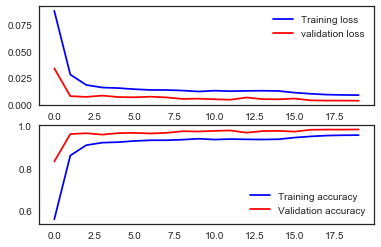

In [56]:
model11 = Sequential()

model11.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model11.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model11.add(MaxPool2D(pool_size=(2,2)))
model11.add(Dropout(0.25))


model11.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model11.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model11.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model11.add(Dropout(0.25))


model11.add(Flatten())
model11.add(Dense(256, activation = "relu"))
model11.add(Dropout(0.5))
model11.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model11.compile(optimizer = optimizer , loss = "mean_absolute_error", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model11.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model11.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#use mean_absolute_percentage_error

Epoch 1/20
 - 256s - loss: 35000018.4583 - acc: 0.6536 - val_loss: 14291414.5412 - val_acc: 0.8578
Epoch 2/20
 - 260s - loss: 12415475.5042 - acc: 0.8768 - val_loss: 3965956.5306 - val_acc: 0.9607
Epoch 3/20
 - 280s - loss: 8272836.8705 - acc: 0.9180 - val_loss: 4277510.4218 - val_acc: 0.9576
Epoch 4/20
 - 270s - loss: 7427488.9105 - acc: 0.9258 - val_loss: 2458582.8875 - val_acc: 0.9753
Epoch 5/20
 - 289s - loss: 6936616.4193 - acc: 0.9308 - val_loss: 3404642.5299 - val_acc: 0.9660
Epoch 6/20
 - 261s - loss: 6912707.6640 - acc: 0.9313 - val_loss: 2438927.4743 - val_acc: 0.9756
Epoch 7/20
 - 247s - loss: 6661664.0191 - acc: 0.9335 - val_loss: 2412095.8964 - val_acc: 0.9760
Epoch 8/20
 - 245s - loss: 6609646.9444 - acc: 0.9341 - val_loss: 2740154.5966 - val_acc: 0.9726
Epoch 9/20
 - 244s - loss: 6361612.1980 - acc: 0.9366 - val_loss: 2295507.9953 - val_acc: 0.9772
Epoch 10/20
 - 242s - loss: 6529879.7862 - acc: 0.9346 - val_loss: 2219327.4700 - val_acc: 0.9778
Epoch 11/20
 - 239s - loss

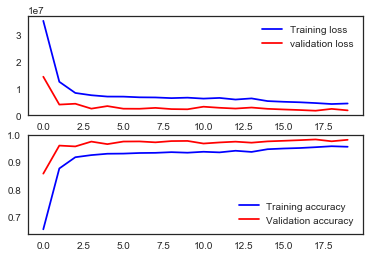

In [57]:
model12 = Sequential()

model12.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model12.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model12.add(MaxPool2D(pool_size=(2,2)))
model12.add(Dropout(0.25))


model12.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model12.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model12.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model12.add(Dropout(0.25))


model12.add(Flatten())
model12.add(Dense(256, activation = "relu"))
model12.add(Dropout(0.5))
model12.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model12.compile(optimizer = optimizer , loss = "mean_absolute_percentage_error", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model12.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model12.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#use mean_squared_logarithmic_error

Epoch 1/20
 - 213s - loss: 0.0104 - acc: 0.8477 - val_loss: 0.0021 - val_acc: 0.9729
Epoch 2/20
 - 203s - loss: 0.0038 - acc: 0.9507 - val_loss: 0.0015 - val_acc: 0.9805
Epoch 3/20
 - 203s - loss: 0.0028 - acc: 0.9620 - val_loss: 0.0011 - val_acc: 0.9856
Epoch 4/20
 - 204s - loss: 0.0023 - acc: 0.9693 - val_loss: 0.0013 - val_acc: 0.9835
Epoch 5/20
 - 204s - loss: 0.0021 - acc: 0.9735 - val_loss: 9.8526e-04 - val_acc: 0.9871
Epoch 6/20
 - 205s - loss: 0.0019 - acc: 0.9750 - val_loss: 0.0013 - val_acc: 0.9834
Epoch 7/20
 - 206s - loss: 0.0019 - acc: 0.9759 - val_loss: 7.5970e-04 - val_acc: 0.9902
Epoch 8/20
 - 217s - loss: 0.0017 - acc: 0.9771 - val_loss: 7.5036e-04 - val_acc: 0.9903
Epoch 9/20
 - 236s - loss: 0.0017 - acc: 0.9786 - val_loss: 8.7151e-04 - val_acc: 0.9884
Epoch 10/20
 - 218s - loss: 0.0016 - acc: 0.9796 - val_loss: 8.3893e-04 - val_acc: 0.9898
Epoch 11/20
 - 208s - loss: 0.0015 - acc: 0.9806 - val_loss: 7.0344e-04 - val_acc: 0.9913
Epoch 12/20
 - 207s - loss: 0.0015 - ac

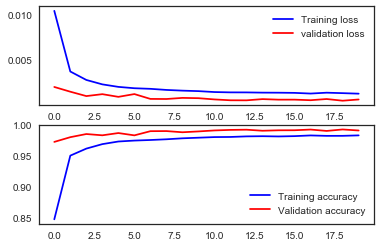

In [65]:
model13 = Sequential()

model13.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model13.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model13.add(MaxPool2D(pool_size=(2,2)))
model13.add(Dropout(0.25))


model13.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model13.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model13.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model13.add(Dropout(0.25))


model13.add(Flatten())
model13.add(Dense(256, activation = "relu"))
model13.add(Dropout(0.5))
model13.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model13.compile(optimizer = optimizer , loss = "mean_squared_logarithmic_error", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model13.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model13.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#use squared_hinge

Epoch 1/20
 - 208s - loss: 0.9169 - acc: 0.8105 - val_loss: 0.9030 - val_acc: 0.9651
Epoch 2/20
 - 207s - loss: 0.9052 - acc: 0.9395 - val_loss: 0.9022 - val_acc: 0.9740
Epoch 3/20
 - 207s - loss: 0.9040 - acc: 0.9545 - val_loss: 0.9017 - val_acc: 0.9812
Epoch 4/20
 - 207s - loss: 0.9032 - acc: 0.9619 - val_loss: 0.9015 - val_acc: 0.9818
Epoch 5/20
 - 208s - loss: 0.9028 - acc: 0.9675 - val_loss: 0.9017 - val_acc: 0.9805
Epoch 6/20
 - 206s - loss: 0.9025 - acc: 0.9700 - val_loss: 0.9011 - val_acc: 0.9869
Epoch 7/20
 - 207s - loss: 0.9023 - acc: 0.9729 - val_loss: 0.9011 - val_acc: 0.9870
Epoch 8/20
 - 206s - loss: 0.9022 - acc: 0.9746 - val_loss: 0.9012 - val_acc: 0.9857
Epoch 9/20
 - 206s - loss: 0.9020 - acc: 0.9763 - val_loss: 0.9011 - val_acc: 0.9868
Epoch 10/20
 - 205s - loss: 0.9021 - acc: 0.9752 - val_loss: 0.9010 - val_acc: 0.9888
Epoch 11/20
 - 206s - loss: 0.9019 - acc: 0.9779 - val_loss: 0.9008 - val_acc: 0.9909
Epoch 12/20
 - 206s - loss: 0.9018 - acc: 0.9792 - val_loss: 0.

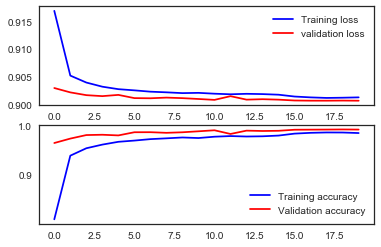

In [58]:
model14 = Sequential()

model14.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model14.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model14.add(MaxPool2D(pool_size=(2,2)))
model14.add(Dropout(0.25))


model14.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model14.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model14.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model14.add(Dropout(0.25))


model14.add(Flatten())
model14.add(Dense(256, activation = "relu"))
model14.add(Dropout(0.5))
model14.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model14.compile(optimizer = optimizer , loss = "squared_hinge", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model14.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model14.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#hinge

Epoch 1/20
 - 208s - loss: 0.9328 - acc: 0.6761 - val_loss: 0.9135 - val_acc: 0.8646
Epoch 2/20
 - 208s - loss: 0.9158 - acc: 0.8426 - val_loss: 0.9038 - val_acc: 0.9621
Epoch 3/20
 - 208s - loss: 0.9086 - acc: 0.9148 - val_loss: 0.9033 - val_acc: 0.9667
Epoch 4/20
 - 208s - loss: 0.9072 - acc: 0.9286 - val_loss: 0.9025 - val_acc: 0.9756
Epoch 5/20
 - 207s - loss: 0.9066 - acc: 0.9341 - val_loss: 0.9024 - val_acc: 0.9762
Epoch 6/20
 - 207s - loss: 0.9065 - acc: 0.9354 - val_loss: 0.9021 - val_acc: 0.9789
Epoch 7/20
 - 207s - loss: 0.9061 - acc: 0.9399 - val_loss: 0.9025 - val_acc: 0.9753
Epoch 8/20
 - 207s - loss: 0.9061 - acc: 0.9386 - val_loss: 0.9025 - val_acc: 0.9752
Epoch 9/20
 - 207s - loss: 0.9061 - acc: 0.9386 - val_loss: 0.9034 - val_acc: 0.9659
Epoch 10/20
 - 207s - loss: 0.9059 - acc: 0.9410 - val_loss: 0.9024 - val_acc: 0.9755

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 11/20
 - 207s - loss: 0.9048 - acc: 0.9524 - val_loss: 0.9022 

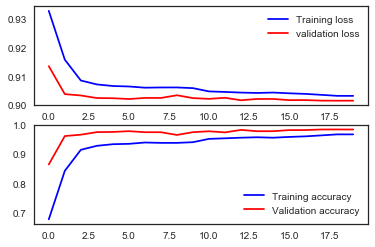

In [59]:
model15 = Sequential()

model15.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model15.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model15.add(MaxPool2D(pool_size=(2,2)))
model15.add(Dropout(0.25))


model15.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model15.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model15.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model15.add(Dropout(0.25))


model15.add(Flatten())
model15.add(Dense(256, activation = "relu"))
model15.add(Dropout(0.5))
model15.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model15.compile(optimizer = optimizer , loss = "hinge", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model15.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model15.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#categorical_hinge

Epoch 1/20
 - 207s - loss: 1.0002 - acc: 0.1015 - val_loss: 1.0001 - val_acc: 0.0943
Epoch 2/20
 - 207s - loss: 1.0001 - acc: 0.0966 - val_loss: 1.0001 - val_acc: 0.1044
Epoch 3/20
 - 206s - loss: 1.0001 - acc: 0.0997 - val_loss: 1.0001 - val_acc: 0.1147
Epoch 4/20
 - 206s - loss: 1.0001 - acc: 0.1033 - val_loss: 1.0001 - val_acc: 0.0993
Epoch 5/20
 - 207s - loss: 1.0001 - acc: 0.1007 - val_loss: 1.0001 - val_acc: 0.0943
Epoch 6/20
 - 207s - loss: 1.0001 - acc: 0.1000 - val_loss: 1.0001 - val_acc: 0.1039
Epoch 7/20
 - 207s - loss: 1.0001 - acc: 0.1003 - val_loss: 1.0001 - val_acc: 0.0994

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/20
 - 207s - loss: 1.0001 - acc: 0.1001 - val_loss: 1.0001 - val_acc: 0.0964
Epoch 9/20
 - 207s - loss: 1.0001 - acc: 0.0971 - val_loss: 1.0001 - val_acc: 0.0899
Epoch 10/20
 - 207s - loss: 1.0001 - acc: 0.0993 - val_loss: 1.0001 - val_acc: 0.1147

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.00025000

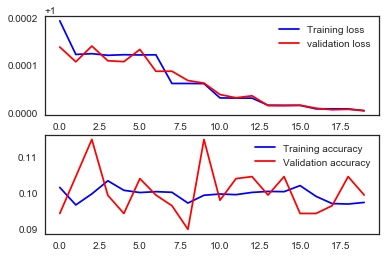

In [60]:
model16 = Sequential()

model16.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model16.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model16.add(MaxPool2D(pool_size=(2,2)))
model16.add(Dropout(0.25))


model16.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model16.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model16.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model16.add(Dropout(0.25))


model16.add(Flatten())
model16.add(Dense(256, activation = "relu"))
model16.add(Dropout(0.5))
model16.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model16.compile(optimizer = optimizer , loss = "categorical_hinge", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model16.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model16.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#logcosh

Epoch 1/20
 - 210s - loss: 0.0106 - acc: 0.8344 - val_loss: 0.0019 - val_acc: 0.9726
Epoch 2/20
 - 209s - loss: 0.0037 - acc: 0.9468 - val_loss: 0.0011 - val_acc: 0.9835
Epoch 3/20
 - 209s - loss: 0.0029 - acc: 0.9587 - val_loss: 0.0011 - val_acc: 0.9839
Epoch 4/20
 - 208s - loss: 0.0024 - acc: 0.9659 - val_loss: 0.0012 - val_acc: 0.9828
Epoch 5/20
 - 209s - loss: 0.0021 - acc: 0.9703 - val_loss: 0.0010 - val_acc: 0.9860
Epoch 6/20
 - 208s - loss: 0.0020 - acc: 0.9730 - val_loss: 8.2143e-04 - val_acc: 0.9883
Epoch 7/20
 - 208s - loss: 0.0018 - acc: 0.9752 - val_loss: 8.0620e-04 - val_acc: 0.9889
Epoch 8/20
 - 208s - loss: 0.0017 - acc: 0.9766 - val_loss: 7.5370e-04 - val_acc: 0.9898
Epoch 9/20
 - 208s - loss: 0.0016 - acc: 0.9773 - val_loss: 6.6639e-04 - val_acc: 0.9909
Epoch 10/20
 - 207s - loss: 0.0016 - acc: 0.9781 - val_loss: 7.1530e-04 - val_acc: 0.9903
Epoch 11/20
 - 208s - loss: 0.0014 - acc: 0.9805 - val_loss: 6.8678e-04 - val_acc: 0.9907
Epoch 12/20
 - 208s - loss: 0.0015 - ac

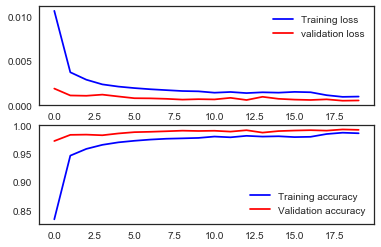

In [61]:
model17 = Sequential()

model17.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model17.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model17.add(MaxPool2D(pool_size=(2,2)))
model17.add(Dropout(0.25))


model17.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model17.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model17.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model17.add(Dropout(0.25))


model17.add(Flatten())
model17.add(Dense(256, activation = "relu"))
model17.add(Dropout(0.5))
model17.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model17.compile(optimizer = optimizer , loss = "logcosh", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model17.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model17.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#sparse_categorical_crossentropy

In [66]:
model18 = Sequential()

model18.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model18.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model18.add(MaxPool2D(pool_size=(2,2)))
model18.add(Dropout(0.25))


model18.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model18.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model18.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model18.add(Dropout(0.25))


model18.add(Flatten())
model18.add(Dense(256, activation = "relu"))
model18.add(Dropout(0.5))
model18.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model18.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model18.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model18.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

ValueError: Error when checking target: expected dense_42 to have shape (1,) but got array with shape (10,)

In [ ]:
#binary_crossentropy

Epoch 1/20
 - 209s - loss: 0.0769 - acc: 0.9726 - val_loss: 0.0122 - val_acc: 0.9957
Epoch 2/20
 - 208s - loss: 0.0260 - acc: 0.9914 - val_loss: 0.0134 - val_acc: 0.9959
Epoch 3/20
 - 208s - loss: 0.0194 - acc: 0.9938 - val_loss: 0.0090 - val_acc: 0.9969
Epoch 4/20
 - 208s - loss: 0.0161 - acc: 0.9948 - val_loss: 0.0077 - val_acc: 0.9976
Epoch 5/20
 - 208s - loss: 0.0139 - acc: 0.9956 - val_loss: 0.0068 - val_acc: 0.9979
Epoch 6/20
 - 208s - loss: 0.0126 - acc: 0.9960 - val_loss: 0.0058 - val_acc: 0.9983
Epoch 7/20
 - 207s - loss: 0.0122 - acc: 0.9964 - val_loss: 0.0057 - val_acc: 0.9983
Epoch 8/20
 - 208s - loss: 0.0123 - acc: 0.9962 - val_loss: 0.0059 - val_acc: 0.9982
Epoch 9/20
 - 208s - loss: 0.0111 - acc: 0.9967 - val_loss: 0.0065 - val_acc: 0.9983
Epoch 10/20
 - 208s - loss: 0.0105 - acc: 0.9967 - val_loss: 0.0059 - val_acc: 0.9985
Epoch 11/20
 - 208s - loss: 0.0103 - acc: 0.9969 - val_loss: 0.0049 - val_acc: 0.9985
Epoch 12/20
 - 209s - loss: 0.0109 - acc: 0.9967 - val_loss: 0.

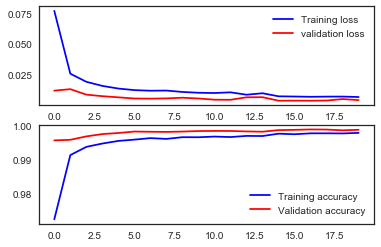

In [62]:
model19 = Sequential()

model19.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model19.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model19.add(MaxPool2D(pool_size=(2,2)))
model19.add(Dropout(0.25))


model19.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model19.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model19.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model19.add(Dropout(0.25))


model19.add(Flatten())
model19.add(Dense(256, activation = "relu"))
model19.add(Dropout(0.5))
model19.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model19.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model19.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model19.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#kullback_leibler_divergence

Epoch 1/20
 - 212s - loss: 0.4954 - acc: 0.8384 - val_loss: 0.0819 - val_acc: 0.9745
Epoch 2/20
 - 210s - loss: 0.1480 - acc: 0.9539 - val_loss: 0.0523 - val_acc: 0.9824
Epoch 3/20
 - 209s - loss: 0.1059 - acc: 0.9679 - val_loss: 0.0521 - val_acc: 0.9840
Epoch 4/20
 - 208s - loss: 0.0895 - acc: 0.9730 - val_loss: 0.0422 - val_acc: 0.9875
Epoch 5/20
 - 208s - loss: 0.0774 - acc: 0.9766 - val_loss: 0.0363 - val_acc: 0.9887
Epoch 6/20
 - 207s - loss: 0.0712 - acc: 0.9781 - val_loss: 0.0313 - val_acc: 0.9917
Epoch 7/20
 - 217s - loss: 0.0685 - acc: 0.9799 - val_loss: 0.0293 - val_acc: 0.9916
Epoch 8/20
 - 230s - loss: 0.0669 - acc: 0.9806 - val_loss: 0.0609 - val_acc: 0.9829
Epoch 9/20
 - 217s - loss: 0.0628 - acc: 0.9817 - val_loss: 0.0264 - val_acc: 0.9927
Epoch 10/20
 - 209s - loss: 0.0606 - acc: 0.9829 - val_loss: 0.0272 - val_acc: 0.9917
Epoch 11/20
 - 209s - loss: 0.0565 - acc: 0.9837 - val_loss: 0.0326 - val_acc: 0.9904
Epoch 12/20
 - 208s - loss: 0.0593 - acc: 0.9836 - val_loss: 0.

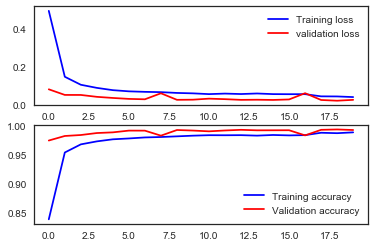

In [63]:
model20 = Sequential()

model20.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model20.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model20.add(MaxPool2D(pool_size=(2,2)))
model20.add(Dropout(0.25))


model20.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model20.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model20.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model20.add(Dropout(0.25))


model20.add(Flatten())
model20.add(Dense(256, activation = "relu"))
model20.add(Dropout(0.5))
model20.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model20.compile(optimizer = optimizer , loss = "kullback_leibler_divergence", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model20.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model20.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#poisson

Epoch 1/20
 - 227s - loss: 0.1490 - acc: 0.8408 - val_loss: 0.1070 - val_acc: 0.9777
Epoch 2/20
 - 219s - loss: 0.1150 - acc: 0.9544 - val_loss: 0.1047 - val_acc: 0.9848
Epoch 3/20
 - 230s - loss: 0.1106 - acc: 0.9683 - val_loss: 0.1049 - val_acc: 0.9837
Epoch 4/20
 - 235s - loss: 0.1091 - acc: 0.9735 - val_loss: 0.1041 - val_acc: 0.9875
Epoch 5/20
 - 205s - loss: 0.1078 - acc: 0.9772 - val_loss: 0.1036 - val_acc: 0.9898
Epoch 6/20
 - 202s - loss: 0.1072 - acc: 0.9797 - val_loss: 0.1036 - val_acc: 0.9895
Epoch 7/20
 - 202s - loss: 0.1069 - acc: 0.9794 - val_loss: 0.1034 - val_acc: 0.9900
Epoch 8/20
 - 204s - loss: 0.1060 - acc: 0.9821 - val_loss: 0.1032 - val_acc: 0.9912
Epoch 9/20
 - 205s - loss: 0.1063 - acc: 0.9823 - val_loss: 0.1033 - val_acc: 0.9904
Epoch 10/20
 - 209s - loss: 0.1061 - acc: 0.9830 - val_loss: 0.1026 - val_acc: 0.9923
Epoch 11/20
 - 211s - loss: 0.1060 - acc: 0.9833 - val_loss: 0.1025 - val_acc: 0.9929
Epoch 12/20
 - 1513s - loss: 0.1061 - acc: 0.9826 - val_loss: 0

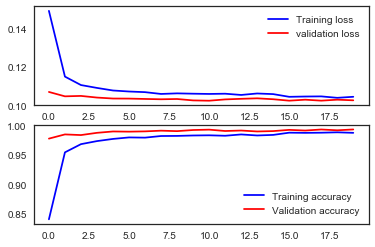

In [68]:
model21 = Sequential()

model21.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model21.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model21.add(MaxPool2D(pool_size=(2,2)))
model21.add(Dropout(0.25))


model21.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model21.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model21.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model21.add(Dropout(0.25))


model21.add(Flatten())
model21.add(Dense(256, activation = "relu"))
model21.add(Dropout(0.5))
model21.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model21.compile(optimizer = optimizer , loss = "poisson", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model21.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model21.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

In [ ]:
#cosine_proximity

In [64]:
model22 = Sequential()

model22.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model22.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model22.add(MaxPool2D(pool_size=(2,2)))
model22.add(Dropout(0.25))


model22.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model22.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model22.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model22.add(Dropout(0.25))


model22.add(Flatten())
model22.add(Dense(256, activation = "relu"))
model22.add(Dropout(0.5))
model22.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model22.compile(optimizer = optimizer , loss = "cosine_proximity", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model22.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model22.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

TypeError: l2_normalize() got an unexpected keyword argument 'axis'

In [ ]:
#use binary_crossentropy is best

Epoch 1/20
 - 217s - loss: 0.3252 - acc: 0.9000 - val_loss: 0.3250 - val_acc: 0.9000
Epoch 2/20
 - 206s - loss: 0.3252 - acc: 0.9000 - val_loss: 0.3249 - val_acc: 0.9000
Epoch 3/20
 - 206s - loss: 0.3251 - acc: 0.9000 - val_loss: 0.3248 - val_acc: 0.9000
Epoch 4/20
 - 207s - loss: 0.3251 - acc: 0.9000 - val_loss: 0.3248 - val_acc: 0.9000
Epoch 5/20
 - 218s - loss: 0.3250 - acc: 0.9000 - val_loss: 0.3247 - val_acc: 0.9000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
 - 210s - loss: 0.3250 - acc: 0.9000 - val_loss: 0.3247 - val_acc: 0.9000
Epoch 7/20
 - 207s - loss: 0.3250 - acc: 0.9000 - val_loss: 0.3246 - val_acc: 0.9000
Epoch 8/20
 - 218s - loss: 0.3250 - acc: 0.9000 - val_loss: 0.3246 - val_acc: 0.9000

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 9/20
 - 210s - loss: 0.3249 - acc: 0.9000 - val_loss: 0.3246 - val_acc: 0.9000
Epoch 10/20
 - 212s - loss: 0.3249 - acc: 0.9000 - val_loss: 0.3246 - val

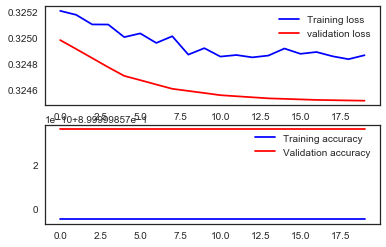

In [71]:
from keras.optimizers import *
model23 = Sequential()

model23.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model23.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model23.add(MaxPool2D(pool_size=(2,2)))
model23.add(Dropout(0.25))


model23.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model23.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model23.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model23.add(Dropout(0.25))


model23.add(Flatten())
model23.add(Dense(256, activation = "relu"))
model23.add(Dropout(0.5))
model23.add(Dense(10, activation = "softmax"))

optimizer = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

model23.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model23.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model23.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 219s - loss: 0.1389 - acc: 0.9490 - val_loss: 0.0332 - val_acc: 0.9894
Epoch 2/20
 - 220s - loss: 0.0721 - acc: 0.9744 - val_loss: 0.0252 - val_acc: 0.9917
Epoch 3/20
 - 217s - loss: 0.0595 - acc: 0.9790 - val_loss: 0.0220 - val_acc: 0.9927
Epoch 4/20
 - 234s - loss: 0.0543 - acc: 0.9811 - val_loss: 0.0202 - val_acc: 0.9934
Epoch 5/20
 - 234s - loss: 0.0490 - acc: 0.9831 - val_loss: 0.0192 - val_acc: 0.9935
Epoch 6/20
 - 238s - loss: 0.0455 - acc: 0.9840 - val_loss: 0.0178 - val_acc: 0.9942
Epoch 7/20
 - 220s - loss: 0.0438 - acc: 0.9851 - val_loss: 0.0174 - val_acc: 0.9941
Epoch 8/20
 - 218s - loss: 0.0424 - acc: 0.9854 - val_loss: 0.0168 - val_acc: 0.9943
Epoch 9/20
 - 219s - loss: 0.0404 - acc: 0.9864 - val_loss: 0.0159 - val_acc: 0.9946
Epoch 10/20
 - 238s - loss: 0.0391 - acc: 0.9870 - val_loss: 0.0158 - val_acc: 0.9947
Epoch 11/20
 - 242s - loss: 0.0383 - acc: 0.9869 - val_loss: 0.0152 - val_acc: 0.9948
Epoch 12/20
 - 232s - loss: 0.0366 - acc: 0.9874 - val_loss: 0.

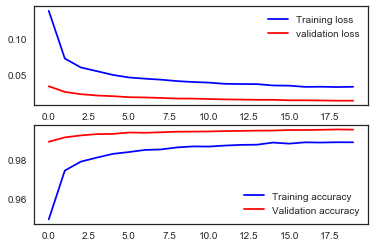

In [72]:
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model24 = Sequential()

model24.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model24.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model24.add(MaxPool2D(pool_size=(2,2)))
model24.add(Dropout(0.25))


model24.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model24.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model24.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model24.add(Dropout(0.25))


model24.add(Flatten())
model24.add(Dense(256, activation = "relu"))
model24.add(Dropout(0.5))
model24.add(Dense(10, activation = "softmax"))

optimizer = Adagrad(lr=0.001, epsilon=1e-08)

model24.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model24.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model24.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 270s - loss: 0.3254 - acc: 0.9000 - val_loss: 0.3251 - val_acc: 0.9000
Epoch 2/20
 - 241s - loss: 0.3254 - acc: 0.9000 - val_loss: 0.3251 - val_acc: 0.9000
Epoch 3/20
 - 217s - loss: 0.3253 - acc: 0.9000 - val_loss: 0.3250 - val_acc: 0.9000
Epoch 4/20
 - 216s - loss: 0.3253 - acc: 0.9000 - val_loss: 0.3250 - val_acc: 0.9000
Epoch 5/20
 - 216s - loss: 0.3252 - acc: 0.9000 - val_loss: 0.3250 - val_acc: 0.9000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
 - 217s - loss: 0.3252 - acc: 0.9000 - val_loss: 0.3249 - val_acc: 0.9000
Epoch 7/20
 - 216s - loss: 0.3252 - acc: 0.9000 - val_loss: 0.3249 - val_acc: 0.9000
Epoch 8/20
 - 226s - loss: 0.3252 - acc: 0.9000 - val_loss: 0.3249 - val_acc: 0.9000

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 9/20
 - 256s - loss: 0.3252 - acc: 0.9000 - val_loss: 0.3249 - val_acc: 0.9000
Epoch 10/20
 - 245s - loss: 0.3252 - acc: 0.9000 - val_loss: 0.3249 - val

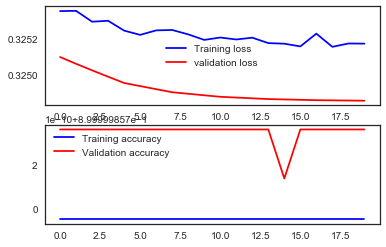

In [73]:
model25 = Sequential()

model25.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model25.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model25.add(MaxPool2D(pool_size=(2,2)))
model25.add(Dropout(0.25))


model25.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model25.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model25.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model25.add(Dropout(0.25))


model25.add(Flatten())
model25.add(Dense(256, activation = "relu"))
model25.add(Dropout(0.5))
model25.add(Dense(10, activation = "softmax"))

optimizer = Adadelta(lr=0.001, rho=0.9, epsilon=1e-08)

model25.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model25.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model25.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 323s - loss: 0.0798 - acc: 0.9718 - val_loss: 0.0151 - val_acc: 0.9951
Epoch 2/20
 - 307s - loss: 0.0277 - acc: 0.9906 - val_loss: 0.0102 - val_acc: 0.9965
Epoch 3/20
 - 271s - loss: 0.0225 - acc: 0.9926 - val_loss: 0.0084 - val_acc: 0.9972
Epoch 4/20
 - 267s - loss: 0.0175 - acc: 0.9945 - val_loss: 0.0071 - val_acc: 0.9976
Epoch 5/20
 - 267s - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0073 - val_acc: 0.9975
Epoch 6/20
 - 264s - loss: 0.0144 - acc: 0.9955 - val_loss: 0.0059 - val_acc: 0.9980
Epoch 7/20
 - 264s - loss: 0.0128 - acc: 0.9960 - val_loss: 0.0053 - val_acc: 0.9982
Epoch 8/20
 - 265s - loss: 0.0118 - acc: 0.9962 - val_loss: 0.0064 - val_acc: 0.9980
Epoch 9/20
 - 292s - loss: 0.0117 - acc: 0.9962 - val_loss: 0.0054 - val_acc: 0.9984
Epoch 10/20
 - 261s - loss: 0.0104 - acc: 0.9966 - val_loss: 0.0053 - val_acc: 0.9985
Epoch 11/20
 - 266s - loss: 0.0104 - acc: 0.9966 - val_loss: 0.0070 - val_acc: 0.9979
Epoch 12/20
 - 267s - loss: 0.0097 - acc: 0.9969 - val_loss: 0.

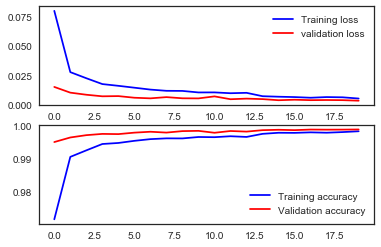

In [74]:
#optimizer = Adam(lr=1e-4)
model26 = Sequential()

model26.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model26.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model26.add(MaxPool2D(pool_size=(2,2)))
model26.add(Dropout(0.25))


model26.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model26.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model26.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model26.add(Dropout(0.25))


model26.add(Flatten())
model26.add(Dense(256, activation = "relu"))
model26.add(Dropout(0.5))
model26.add(Dense(10, activation = "softmax"))

optimizer = Adam(lr=0.001,epsilon=1e-08)

model26.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model26.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model26.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 276s - loss: 0.1154 - acc: 0.9590 - val_loss: 0.0187 - val_acc: 0.9939
Epoch 2/20
 - 272s - loss: 0.0404 - acc: 0.9861 - val_loss: 0.0132 - val_acc: 0.9957
Epoch 3/20
 - 273s - loss: 0.0305 - acc: 0.9901 - val_loss: 0.0109 - val_acc: 0.9963
Epoch 4/20
 - 282s - loss: 0.0247 - acc: 0.9916 - val_loss: 0.0097 - val_acc: 0.9968
Epoch 5/20
 - 273s - loss: 0.0220 - acc: 0.9926 - val_loss: 0.0085 - val_acc: 0.9971
Epoch 6/20
 - 275s - loss: 0.0190 - acc: 0.9937 - val_loss: 0.0074 - val_acc: 0.9976
Epoch 7/20
 - 273s - loss: 0.0177 - acc: 0.9942 - val_loss: 0.0071 - val_acc: 0.9978
Epoch 8/20
 - 277s - loss: 0.0165 - acc: 0.9947 - val_loss: 0.0066 - val_acc: 0.9979
Epoch 9/20
 - 274s - loss: 0.0151 - acc: 0.9950 - val_loss: 0.0078 - val_acc: 0.9976
Epoch 10/20
 - 274s - loss: 0.0143 - acc: 0.9953 - val_loss: 0.0062 - val_acc: 0.9980
Epoch 11/20
 - 276s - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0055 - val_acc: 0.9984
Epoch 12/20
 - 276s - loss: 0.0125 - acc: 0.9957 - val_loss: 0.

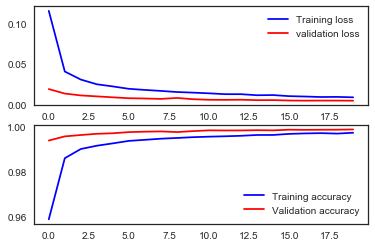

In [75]:
#Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model27 = Sequential()

model27.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model27.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model27.add(MaxPool2D(pool_size=(2,2)))
model27.add(Dropout(0.25))


model27.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model27.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model27.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model27.add(Dropout(0.25))


model27.add(Flatten())
model27.add(Dense(256, activation = "relu"))
model27.add(Dropout(0.5))
model27.add(Dense(10, activation = "softmax"))

optimizer = Adamax(lr=0.001,epsilon=1e-08)

model27.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model27.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model27.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 270s - loss: 0.0745 - acc: 0.9739 - val_loss: 0.0117 - val_acc: 0.9964
Epoch 2/20
 - 268s - loss: 0.0255 - acc: 0.9915 - val_loss: 0.0087 - val_acc: 0.9972
Epoch 3/20
 - 267s - loss: 0.0195 - acc: 0.9937 - val_loss: 0.0077 - val_acc: 0.9974
Epoch 4/20
 - 267s - loss: 0.0159 - acc: 0.9946 - val_loss: 0.0079 - val_acc: 0.9974
Epoch 5/20
 - 267s - loss: 0.0143 - acc: 0.9953 - val_loss: 0.0064 - val_acc: 0.9978
Epoch 6/20
 - 266s - loss: 0.0135 - acc: 0.9958 - val_loss: 0.0053 - val_acc: 0.9984
Epoch 7/20
 - 266s - loss: 0.0116 - acc: 0.9962 - val_loss: 0.0061 - val_acc: 0.9980
Epoch 8/20
 - 266s - loss: 0.0113 - acc: 0.9963 - val_loss: 0.0047 - val_acc: 0.9986
Epoch 9/20
 - 266s - loss: 0.0106 - acc: 0.9966 - val_loss: 0.0053 - val_acc: 0.9984
Epoch 10/20
 - 266s - loss: 0.0101 - acc: 0.9968 - val_loss: 0.0041 - val_acc: 0.9986
Epoch 11/20
 - 237s - loss: 0.0100 - acc: 0.9966 - val_loss: 0.0044 - val_acc: 0.9985
Epoch 12/20
 - 211s - loss: 0.0091 - acc: 0.9970 - val_loss: 0.

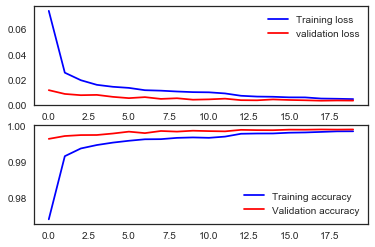

In [76]:
#Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model28 = Sequential()

model28.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model28.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model28.add(MaxPool2D(pool_size=(2,2)))
model28.add(Dropout(0.25))


model28.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model28.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model28.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model28.add(Dropout(0.25))


model28.add(Flatten())
model28.add(Dense(256, activation = "relu"))
model28.add(Dropout(0.5))
model28.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004)

model28.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model28.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model28.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 243s - loss: 0.0725 - acc: 0.9746 - val_loss: 0.0126 - val_acc: 0.9958
Epoch 2/20
 - 223s - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0086 - val_acc: 0.9971
Epoch 3/20
 - 213s - loss: 0.0181 - acc: 0.9941 - val_loss: 0.0071 - val_acc: 0.9977
Epoch 4/20
 - 227s - loss: 0.0152 - acc: 0.9951 - val_loss: 0.0062 - val_acc: 0.9980
Epoch 5/20
 - 233s - loss: 0.0134 - acc: 0.9956 - val_loss: 0.0055 - val_acc: 0.9982
Epoch 6/20
 - 212s - loss: 0.0125 - acc: 0.9960 - val_loss: 0.0054 - val_acc: 0.9982
Epoch 7/20
 - 226s - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0060 - val_acc: 0.9982
Epoch 8/20
 - 215s - loss: 0.0110 - acc: 0.9964 - val_loss: 0.0052 - val_acc: 0.9984
Epoch 9/20
 - 213s - loss: 0.0097 - acc: 0.9968 - val_loss: 0.0051 - val_acc: 0.9984
Epoch 10/20
 - 215s - loss: 0.0093 - acc: 0.9970 - val_loss: 0.0046 - val_acc: 0.9987
Epoch 11/20
 - 219s - loss: 0.0093 - acc: 0.9970 - val_loss: 0.0053 - val_acc: 0.9985
Epoch 12/20
 - 218s - loss: 0.0086 - acc: 0.9972 - val_loss: 0.

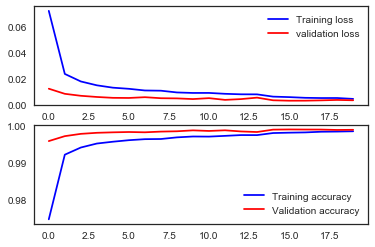

In [77]:
#Nadam(lr=0.002,epsilon=1e-08, schedule_decay=0.004)
from keras.optimizers import *
model29 = Sequential()

model29.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model29.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model29.add(MaxPool2D(pool_size=(2,2)))
model29.add(Dropout(0.25))


model29.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model29.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model29.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model29.add(Dropout(0.25))


model29.add(Flatten())
model29.add(Dense(256, activation = "relu"))
model29.add(Dropout(0.5))
model29.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.0)

model29.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

import time 
t1=time.time()
history = model29.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model29.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 250s - loss: 0.0753 - acc: 0.9735 - val_loss: 0.0129 - val_acc: 0.9957
Epoch 2/20
 - 252s - loss: 0.0258 - acc: 0.9916 - val_loss: 0.0106 - val_acc: 0.9963
Epoch 3/20
 - 269s - loss: 0.0201 - acc: 0.9933 - val_loss: 0.0090 - val_acc: 0.9967
Epoch 4/20
 - 275s - loss: 0.0169 - acc: 0.9947 - val_loss: 0.0061 - val_acc: 0.9981
Epoch 5/20
 - 281s - loss: 0.0153 - acc: 0.9951 - val_loss: 0.0069 - val_acc: 0.9977
Epoch 6/20
 - 301s - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0063 - val_acc: 0.9981
Epoch 7/20
 - 300s - loss: 0.0127 - acc: 0.9959 - val_loss: 0.0058 - val_acc: 0.9981
Epoch 8/20
 - 278s - loss: 0.0110 - acc: 0.9965 - val_loss: 0.0052 - val_acc: 0.9984
Epoch 9/20
 - 256s - loss: 0.0106 - acc: 0.9965 - val_loss: 0.0051 - val_acc: 0.9984
Epoch 10/20
 - 248s - loss: 0.0101 - acc: 0.9968 - val_loss: 0.0043 - val_acc: 0.9985
Epoch 11/20
 - 242s - loss: 0.0098 - acc: 0.9970 - val_loss: 0.0047 - val_acc: 0.9985
Epoch 12/20
 - 238s - loss: 0.0090 - acc: 0.9971 - val_loss: 0.

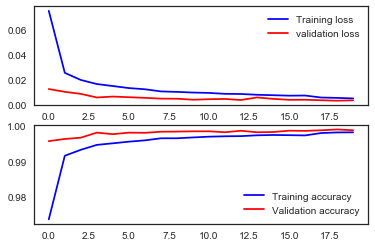

In [78]:
#Nadam(lr=0.002,epsilon=1e-08, schedule_decay=0.004)
from keras.optimizers import *
model30 = Sequential()

model30.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model30.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model30.add(MaxPool2D(pool_size=(2,2)))
model30.add(Dropout(0.25))


model30.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model30.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model30.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model30.add(Dropout(0.25))


model30.add(Flatten())
model30.add(Dense(256, activation = "relu"))
model30.add(Dropout(0.5))
model30.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.0)

model30.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

import time 
t1=time.time()
history = model30.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model30.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 231s - loss: 0.0773 - acc: 0.9725 - val_loss: 0.0126 - val_acc: 0.9954
Epoch 2/20
 - 220s - loss: 0.0265 - acc: 0.9908 - val_loss: 0.0092 - val_acc: 0.9968
Epoch 3/20
 - 215s - loss: 0.0196 - acc: 0.9934 - val_loss: 0.0072 - val_acc: 0.9976
Epoch 4/20
 - 216s - loss: 0.0163 - acc: 0.9946 - val_loss: 0.0066 - val_acc: 0.9978
Epoch 5/20
 - 215s - loss: 0.0150 - acc: 0.9952 - val_loss: 0.0062 - val_acc: 0.9981
Epoch 6/20
 - 214s - loss: 0.0125 - acc: 0.9960 - val_loss: 0.0073 - val_acc: 0.9978
Epoch 7/20
 - 215s - loss: 0.0128 - acc: 0.9957 - val_loss: 0.0054 - val_acc: 0.9982
Epoch 8/20
 - 230s - loss: 0.0110 - acc: 0.9966 - val_loss: 0.0046 - val_acc: 0.9986
Epoch 9/20
 - 217s - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0046 - val_acc: 0.9985
Epoch 10/20
 - 215s - loss: 0.0100 - acc: 0.9968 - val_loss: 0.0048 - val_acc: 0.9984
Epoch 11/20
 - 220s - loss: 0.0091 - acc: 0.9969 - val_loss: 0.0045 - val_acc: 0.9986
Epoch 12/20
 - 216s - loss: 0.0091 - acc: 0.9972 - val_loss: 0.

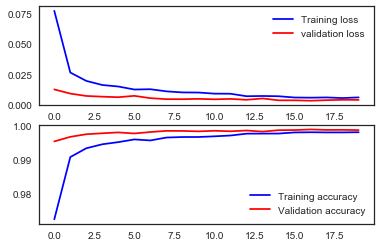

In [81]:
#optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004) is the bset, initializer is 0
#start Network initialization part
model31 = Sequential()

model31.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1), kernel_initializer='uniform'))
model31.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', kernel_initializer='uniform'))
model31.add(MaxPool2D(pool_size=(2,2)))
model31.add(Dropout(0.25))


model31.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model31.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model31.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model31.add(Dropout(0.25))


model31.add(Flatten())
model31.add(Dense(256, activation = "relu"))
model31.add(Dropout(0.5))
model31.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004)

model31.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model31.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model31.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 265s - loss: 0.0803 - acc: 0.9720 - val_loss: 0.0270 - val_acc: 0.9910
Epoch 2/20
 - 262s - loss: 0.0277 - acc: 0.9906 - val_loss: 0.0096 - val_acc: 0.9968
Epoch 3/20
 - 261s - loss: 0.0202 - acc: 0.9935 - val_loss: 0.0080 - val_acc: 0.9972
Epoch 4/20
 - 284s - loss: 0.0174 - acc: 0.9942 - val_loss: 0.0079 - val_acc: 0.9974
Epoch 5/20
 - 318s - loss: 0.0145 - acc: 0.9952 - val_loss: 0.0055 - val_acc: 0.9982
Epoch 6/20
 - 333s - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0063 - val_acc: 0.9977
Epoch 7/20
 - 301s - loss: 0.0122 - acc: 0.9961 - val_loss: 0.0058 - val_acc: 0.9981
Epoch 8/20
 - 270s - loss: 0.0112 - acc: 0.9962 - val_loss: 0.0051 - val_acc: 0.9983
Epoch 9/20
 - 266s - loss: 0.0110 - acc: 0.9964 - val_loss: 0.0053 - val_acc: 0.9985
Epoch 10/20
 - 273s - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0050 - val_acc: 0.9985
Epoch 11/20
 - 260s - loss: 0.0096 - acc: 0.9969 - val_loss: 0.0042 - val_acc: 0.9984
Epoch 12/20
 - 255s - loss: 0.0097 - acc: 0.9969 - val_loss: 0.

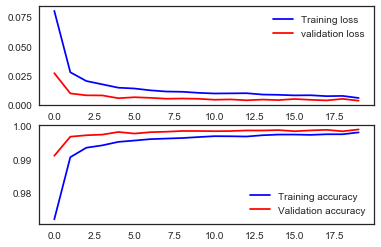

In [82]:
model32 = Sequential()

model32.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1), kernel_initializer='uniform'))
model32.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', kernel_initializer='uniform'))
model32.add(MaxPool2D(pool_size=(2,2)))
model32.add(Dropout(0.25))


model32.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='uniform'))
model32.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='uniform'))
model32.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model32.add(Dropout(0.25))


model32.add(Flatten())
model32.add(Dense(256, activation = "relu"))
model32.add(Dropout(0.5))
model32.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004)

model32.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model32.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model32.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 235s - loss: 0.0706 - acc: 0.9755 - val_loss: 0.0103 - val_acc: 0.9964
Epoch 2/20
 - 228s - loss: 0.0231 - acc: 0.9923 - val_loss: 0.0107 - val_acc: 0.9966
Epoch 3/20
 - 253s - loss: 0.0170 - acc: 0.9943 - val_loss: 0.0075 - val_acc: 0.9977
Epoch 4/20
 - 274s - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0066 - val_acc: 0.9979
Epoch 5/20
 - 284s - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0061 - val_acc: 0.9980
Epoch 6/20
 - 290s - loss: 0.0122 - acc: 0.9962 - val_loss: 0.0057 - val_acc: 0.9982
Epoch 7/20
 - 308s - loss: 0.0113 - acc: 0.9963 - val_loss: 0.0047 - val_acc: 0.9985
Epoch 8/20
 - 286s - loss: 0.0102 - acc: 0.9968 - val_loss: 0.0044 - val_acc: 0.9986
Epoch 9/20
 - 275s - loss: 0.0098 - acc: 0.9969 - val_loss: 0.0050 - val_acc: 0.9985
Epoch 10/20
 - 275s - loss: 0.0094 - acc: 0.9971 - val_loss: 0.0051 - val_acc: 0.9984
Epoch 11/20
 - 277s - loss: 0.0090 - acc: 0.9970 - val_loss: 0.0056 - val_acc: 0.9982

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.000

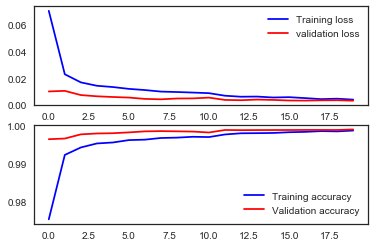

In [83]:
model33 = Sequential()

model33.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1), kernel_initializer='lecun_uniform'))
model33.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', kernel_initializer='lecun_uniform'))
model33.add(MaxPool2D(pool_size=(2,2)))
model33.add(Dropout(0.25))


model33.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='lecun_uniform'))
model33.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='lecun_uniform'))
model33.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model33.add(Dropout(0.25))


model33.add(Flatten())
model33.add(Dense(256, activation = "relu"))
model33.add(Dropout(0.5))
model33.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004)

model33.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model33.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model33.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 208s - loss: 0.0741 - acc: 0.9740 - val_loss: 0.0149 - val_acc: 0.9949
Epoch 2/20
 - 207s - loss: 0.0250 - acc: 0.9915 - val_loss: 0.0087 - val_acc: 0.9970
Epoch 3/20
 - 206s - loss: 0.0178 - acc: 0.9943 - val_loss: 0.0071 - val_acc: 0.9976
Epoch 4/20
 - 207s - loss: 0.0157 - acc: 0.9948 - val_loss: 0.0057 - val_acc: 0.9980
Epoch 5/20
 - 207s - loss: 0.0138 - acc: 0.9954 - val_loss: 0.0056 - val_acc: 0.9981
Epoch 6/20
 - 231s - loss: 0.0130 - acc: 0.9957 - val_loss: 0.0049 - val_acc: 0.9983
Epoch 7/20
 - 234s - loss: 0.0111 - acc: 0.9964 - val_loss: 0.0048 - val_acc: 0.9985
Epoch 8/20
 - 236s - loss: 0.0108 - acc: 0.9966 - val_loss: 0.0054 - val_acc: 0.9982
Epoch 9/20
 - 247s - loss: 0.0104 - acc: 0.9965 - val_loss: 0.0042 - val_acc: 0.9986
Epoch 10/20
 - 286s - loss: 0.0098 - acc: 0.9967 - val_loss: 0.0047 - val_acc: 0.9986
Epoch 11/20
 - 265s - loss: 0.0093 - acc: 0.9971 - val_loss: 0.0041 - val_acc: 0.9987
Epoch 12/20
 - 309s - loss: 0.0091 - acc: 0.9971 - val_loss: 0.

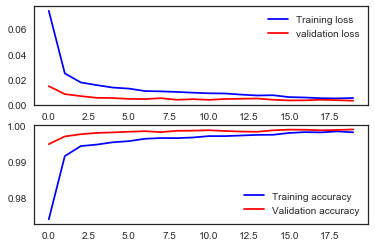

In [84]:
model34 = Sequential()

model34.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1), kernel_initializer='normal'))
model34.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', kernel_initializer='normal'))
model34.add(MaxPool2D(pool_size=(2,2)))
model34.add(Dropout(0.25))


model34.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='normal'))
model34.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='normal'))
model34.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model34.add(Dropout(0.25))


model34.add(Flatten())
model34.add(Dense(256, activation = "relu"))
model34.add(Dropout(0.5))
model34.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004)

model34.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model34.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model34.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 251s - loss: 0.0767 - acc: 0.9732 - val_loss: 0.0127 - val_acc: 0.9957
Epoch 2/20
 - 224s - loss: 0.0261 - acc: 0.9912 - val_loss: 0.0089 - val_acc: 0.9972
Epoch 3/20
 - 227s - loss: 0.0196 - acc: 0.9936 - val_loss: 0.0076 - val_acc: 0.9976
Epoch 4/20
 - 244s - loss: 0.0159 - acc: 0.9948 - val_loss: 0.0131 - val_acc: 0.9955
Epoch 5/20
 - 246s - loss: 0.0142 - acc: 0.9954 - val_loss: 0.0065 - val_acc: 0.9979
Epoch 6/20
 - 246s - loss: 0.0124 - acc: 0.9960 - val_loss: 0.0063 - val_acc: 0.9980
Epoch 7/20
 - 246s - loss: 0.0118 - acc: 0.9960 - val_loss: 0.0055 - val_acc: 0.9984
Epoch 8/20
 - 240s - loss: 0.0115 - acc: 0.9965 - val_loss: 0.0043 - val_acc: 0.9987
Epoch 9/20
 - 246s - loss: 0.0103 - acc: 0.9967 - val_loss: 0.0047 - val_acc: 0.9986
Epoch 10/20
 - 232s - loss: 0.0097 - acc: 0.9970 - val_loss: 0.0044 - val_acc: 0.9984
Epoch 11/20
 - 215s - loss: 0.0097 - acc: 0.9968 - val_loss: 0.0054 - val_acc: 0.9981
Epoch 12/20
 - 214s - loss: 0.0087 - acc: 0.9971 - val_loss: 0.

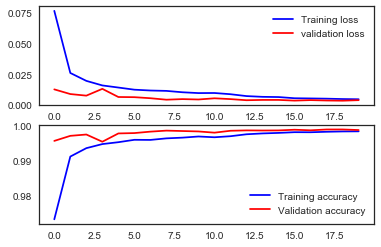

In [85]:
model35 = Sequential()

model35.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1), kernel_initializer='glorot_normal'))
model35.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', kernel_initializer='glorot_normal'))
model35.add(MaxPool2D(pool_size=(2,2)))
model35.add(Dropout(0.25))


model35.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='glorot_normal'))
model35.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='glorot_normal'))
model35.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model35.add(Dropout(0.25))


model35.add(Flatten())
model35.add(Dense(256, activation = "relu"))
model35.add(Dropout(0.5))
model35.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004)

model35.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model35.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model35.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 219s - loss: 0.0747 - acc: 0.9738 - val_loss: 0.0137 - val_acc: 0.9956
Epoch 2/20
 - 217s - loss: 0.0253 - acc: 0.9917 - val_loss: 0.0091 - val_acc: 0.9969
Epoch 3/20
 - 217s - loss: 0.0191 - acc: 0.9936 - val_loss: 0.0070 - val_acc: 0.9976
Epoch 4/20
 - 218s - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0064 - val_acc: 0.9978
Epoch 5/20
 - 219s - loss: 0.0133 - acc: 0.9957 - val_loss: 0.0056 - val_acc: 0.9980
Epoch 6/20
 - 217s - loss: 0.0131 - acc: 0.9958 - val_loss: 0.0055 - val_acc: 0.9983
Epoch 7/20
 - 217s - loss: 0.0112 - acc: 0.9963 - val_loss: 0.0058 - val_acc: 0.9981
Epoch 8/20
 - 217s - loss: 0.0103 - acc: 0.9966 - val_loss: 0.0055 - val_acc: 0.9983
Epoch 9/20
 - 217s - loss: 0.0103 - acc: 0.9966 - val_loss: 0.0045 - val_acc: 0.9985
Epoch 10/20
 - 218s - loss: 0.0094 - acc: 0.9968 - val_loss: 0.0052 - val_acc: 0.9984
Epoch 11/20
 - 217s - loss: 0.0097 - acc: 0.9970 - val_loss: 0.0047 - val_acc: 0.9985
Epoch 12/20
 - 218s - loss: 0.0091 - acc: 0.9971 - val_loss: 0.

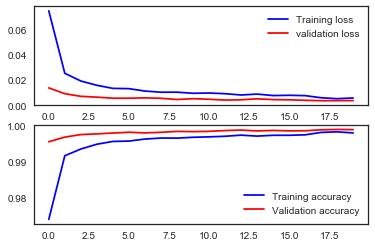

In [86]:
model36 = Sequential()

model36.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1), kernel_initializer='glorot_uniform'))
model36.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', kernel_initializer='glorot_uniform'))
model36.add(MaxPool2D(pool_size=(2,2)))
model36.add(Dropout(0.25))


model36.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='glorot_uniform'))
model36.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='glorot_uniform'))
model36.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model36.add(Dropout(0.25))


model36.add(Flatten())
model36.add(Dense(256, activation = "relu"))
model36.add(Dropout(0.5))
model36.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004)

model36.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model36.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model36.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 218s - loss: 0.0709 - acc: 0.9751 - val_loss: 0.0112 - val_acc: 0.9962
Epoch 2/20
 - 219s - loss: 0.0238 - acc: 0.9920 - val_loss: 0.0092 - val_acc: 0.9970
Epoch 3/20
 - 219s - loss: 0.0183 - acc: 0.9940 - val_loss: 0.0066 - val_acc: 0.9978
Epoch 4/20
 - 219s - loss: 0.0149 - acc: 0.9951 - val_loss: 0.0062 - val_acc: 0.9979
Epoch 5/20
 - 219s - loss: 0.0131 - acc: 0.9958 - val_loss: 0.0059 - val_acc: 0.9981
Epoch 6/20
 - 218s - loss: 0.0118 - acc: 0.9961 - val_loss: 0.0049 - val_acc: 0.9983
Epoch 7/20
 - 219s - loss: 0.0107 - acc: 0.9964 - val_loss: 0.0044 - val_acc: 0.9988
Epoch 8/20
 - 219s - loss: 0.0099 - acc: 0.9969 - val_loss: 0.0049 - val_acc: 0.9984
Epoch 9/20
 - 219s - loss: 0.0104 - acc: 0.9967 - val_loss: 0.0038 - val_acc: 0.9987
Epoch 10/20
 - 221s - loss: 0.0090 - acc: 0.9969 - val_loss: 0.0041 - val_acc: 0.9986
Epoch 11/20
 - 219s - loss: 0.0090 - acc: 0.9972 - val_loss: 0.0049 - val_acc: 0.9985

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.000

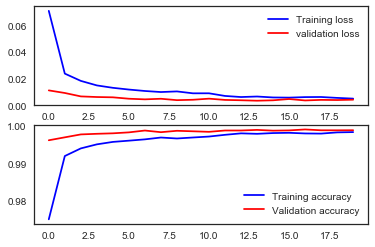

In [87]:
model37 = Sequential()

model37.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1), kernel_initializer='he_normal'))
model37.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', kernel_initializer='he_normal'))
model37.add(MaxPool2D(pool_size=(2,2)))
model37.add(Dropout(0.25))


model37.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='he_normal'))
model37.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='he_normal'))
model37.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model37.add(Dropout(0.25))


model37.add(Flatten())
model37.add(Dense(256, activation = "relu"))
model37.add(Dropout(0.5))
model37.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004)

model37.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model37.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model37.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])

Epoch 1/20
 - 219s - loss: 0.0756 - acc: 0.9731 - val_loss: 0.0115 - val_acc: 0.9962
Epoch 2/20
 - 218s - loss: 0.0244 - acc: 0.9918 - val_loss: 0.0074 - val_acc: 0.9975
Epoch 3/20
 - 219s - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0085 - val_acc: 0.9972
Epoch 4/20
 - 220s - loss: 0.0153 - acc: 0.9950 - val_loss: 0.0061 - val_acc: 0.9980
Epoch 5/20
 - 220s - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0054 - val_acc: 0.9981
Epoch 6/20
 - 220s - loss: 0.0123 - acc: 0.9960 - val_loss: 0.0060 - val_acc: 0.9981
Epoch 7/20
 - 222s - loss: 0.0105 - acc: 0.9966 - val_loss: 0.0066 - val_acc: 0.9978
Epoch 8/20
 - 221s - loss: 0.0108 - acc: 0.9965 - val_loss: 0.0053 - val_acc: 0.9984
Epoch 9/20
 - 220s - loss: 0.0100 - acc: 0.9966 - val_loss: 0.0067 - val_acc: 0.9982
Epoch 10/20
 - 221s - loss: 0.0095 - acc: 0.9969 - val_loss: 0.0044 - val_acc: 0.9985
Epoch 11/20
 - 220s - loss: 0.0093 - acc: 0.9970 - val_loss: 0.0050 - val_acc: 0.9985
Epoch 12/20
 - 222s - loss: 0.0084 - acc: 0.9973 - val_loss: 0.

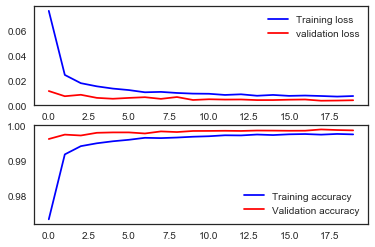

In [88]:
model38 = Sequential()

model38.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1), kernel_initializer='he_uniform'))
model38.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', kernel_initializer='he_uniform'))
model38.add(MaxPool2D(pool_size=(2,2)))
model38.add(Dropout(0.25))


model38.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='he_uniform'))
model38.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', kernel_initializer='he_uniform'))
model38.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model38.add(Dropout(0.25))


model38.add(Flatten())
model38.add(Dense(256, activation = "relu"))
model38.add(Dropout(0.5))
model38.add(Dense(10, activation = "softmax"))

optimizer = Nadam(lr=0.001, epsilon=1e-08, schedule_decay=0.004)

model38.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 20
batch_size = 86

import time 
t1=time.time()
history = model38.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])
t = time.time()-t1 
print("running time is %g s" %(t)) 


fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


score = model38.evaluate(X_val,Y_val, verbose=0)
print('validation loss:', score[0])
print('validation accuracy:', score[1])